# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 3.4.1 Range Profile - Point Targets
---

**Import modules**

In [1]:
%matplotlib inline

import numpy as np

from scipy.constants import pi

from matplotlib import pyplot as plt

**Set up the time array (s)**

In [2]:
t = np.linspace(0, 10, 1000)

**Set the time delay to the target (s)**

In [3]:
t0 = 3.5

**Set the chirp slope**

In [4]:
beta = 1.5

**Set the starting frequency (Hz)**

In [5]:
f0 = 0

**Calculate the transmitted and received waveforms**

In [6]:
st = np.exp(1j * pi * beta * t**2)

sr = np.exp(1j * 2 * pi * (f0 *(t - t0) + 0.5 * beta * (t - t0)**2))

**Perform matched filtering**

In [7]:
H = np.fft.fft(np.conj(st))

S = np.fft.fft(sr)

so = np.fft.ifft(S * H)

**Plot the results**

In [8]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)

**Display the real and imaginary components**

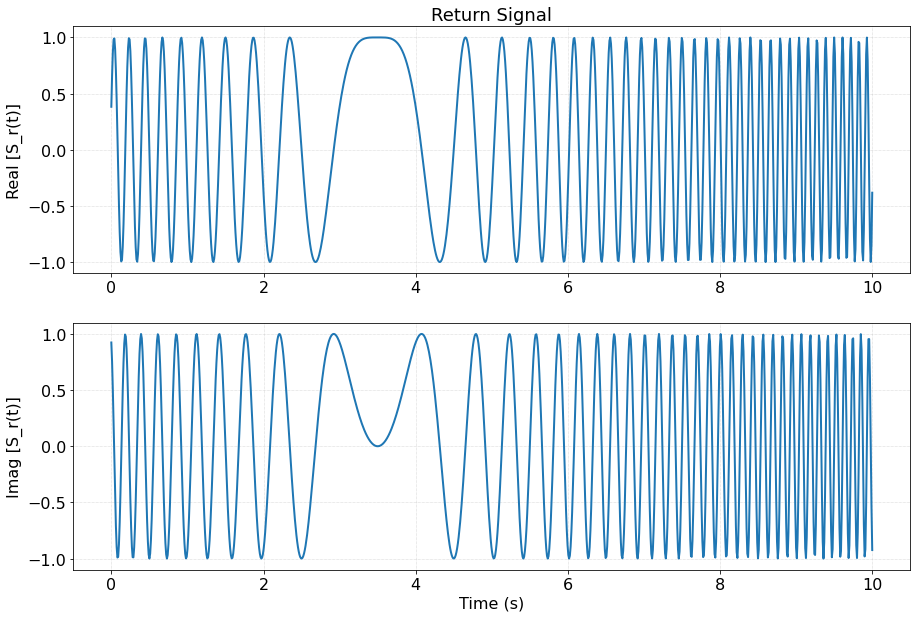

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(t, np.real(sr), linewidth=2)

ax2.plot(t, np.imag(sr), linewidth=2)


# Set the labels and title

ax1.set_title('Return Signal', size=18)

ax2.set_xlabel('Time (s)', size=16)

ax1.set_ylabel('Real [S_r(t)]', size=16)

ax2.set_ylabel('Imag [S_r(t)]', size=16)


# Set the tick label size

ax1.tick_params(labelsize=16)

ax2.tick_params(labelsize=16)



# Turn on the grid

ax1.grid(linestyle=':', linewidth=0.5)

ax2.grid(linestyle=':', linewidth=0.5)

**Display the instantaneous frequency of the return signal**

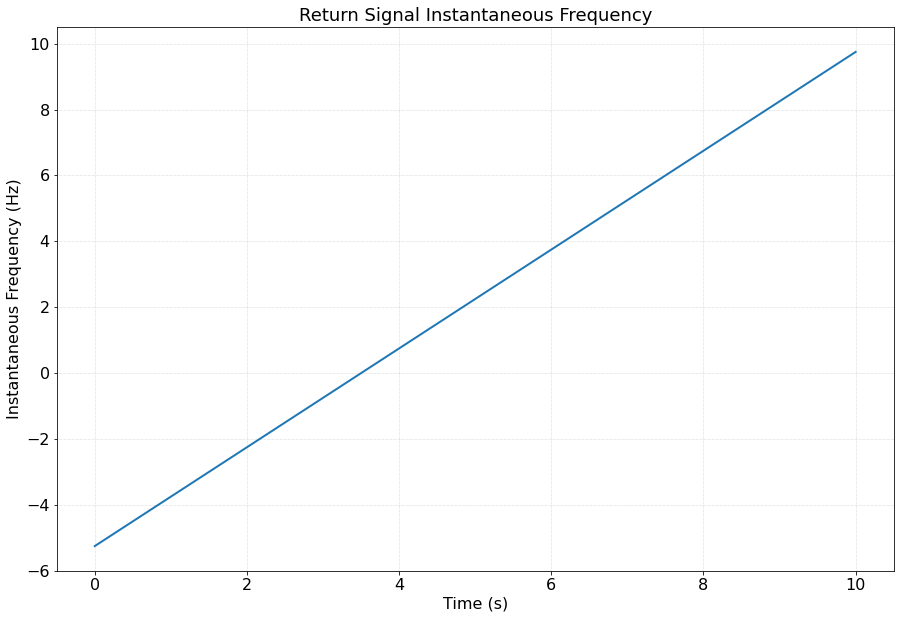

In [10]:
# Plot the frequency

plt.plot(t, f0 + beta * (t - t0), linewidth=2)


# Set the plot title and labels

plt.title('Return Signal Instantaneous Frequency', size=18)

plt.xlabel('Time (s)', size=16)

plt.ylabel('Instantaneous Frequency (Hz)', size=16)


# Set the tick label size

plt.tick_params(labelsize=16)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

**Display the spectrum of the return signal**

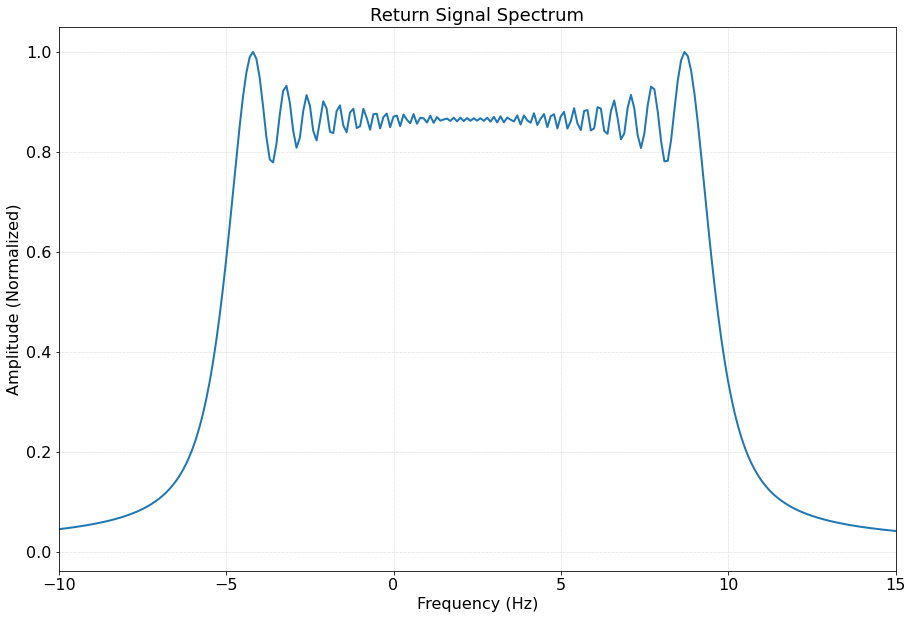

In [11]:
# Calculate the spectrum of the return signal

sf = abs(np.fft.fft(sr))

sf = np.fft.fftshift(sf / np.max(sf))


# Find the frequency space (Hz)

f = np.fft.fftshift(np.fft.fftfreq(len(sf), d=(t[1] - t[0])))



# Plot the spectrum
plt.plot(f, sf, linewidth=2)

plt.xlim(-10, 15)




# Set the plot title and labels

plt.title('Return Signal Spectrum', size=18)

plt.xlabel('Frequency (Hz)', size=16)

plt.ylabel('Amplitude (Normalized)', size=16)



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)

**Display the range profile**

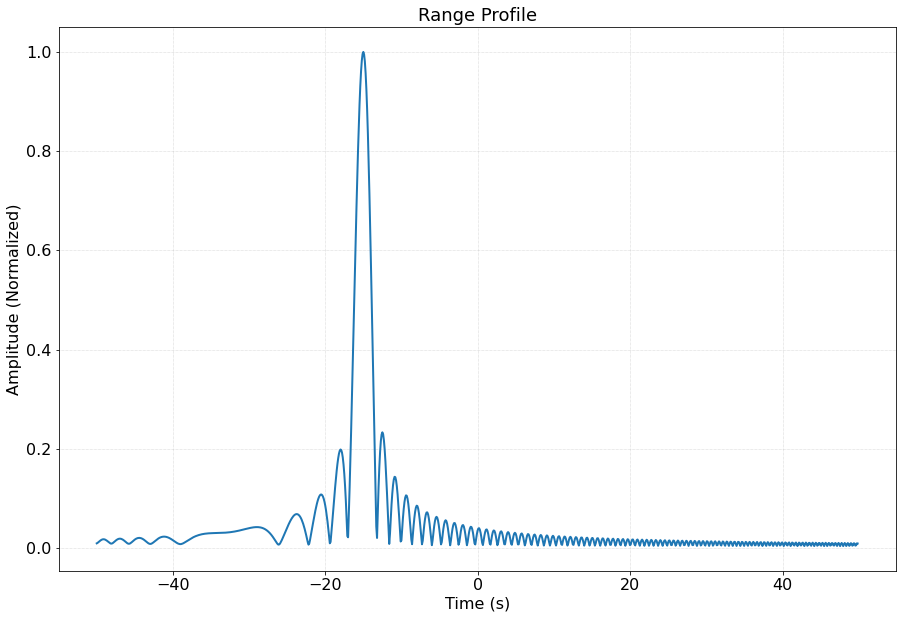

In [12]:
# Plot the range profile

plt.plot(f, abs(so)/np.max(abs(so)), linewidth=2)



# Set the plot title and labels

plt.title('Range Profile', size=18)

plt.xlabel('Time (s)', size=16)

plt.ylabel('Amplitude (Normalized)', size=16)



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)